In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

In [5]:
df_iris = pd.read_fwf("iris.data" , header=None) 

df_iris = pd.DataFrame(df_iris[0].str.split(',',5).tolist() , columns = ['sepal length','sepal width' , 'petal length' ,
                                                               'petal width' , 'class'])

df_X = df_iris[df_iris.columns.tolist()[:-1]]
df_Y = df_iris[df_iris.columns.tolist()[-1]]

df_X_train, df_X_test, df_y_train, df_y_test  = train_test_split(df_X, df_Y, test_size=0.25)   
clf=RandomForestClassifier(n_estimators=70)
clf.fit(df_X_train,df_y_train)
y_pred = clf.predict(df_X_test)

Accuracy = metrics.accuracy_score(df_y_test, y_pred)
print("Accuracy of this model is: "+ str(round(Accuracy , 4)))

Accuracy of this model is: 0.9474


In [6]:
confusion_matrix(df_y_test, y_pred )

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 13]], dtype=int64)

##### Visualize confusion matrix

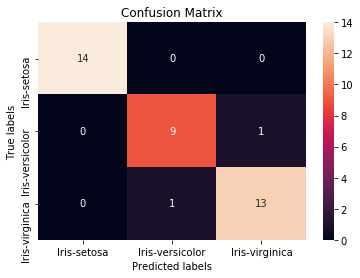

In [7]:
labels = np.unique(df_y_test).tolist()
conf_matrix = confusion_matrix(df_y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(np.unique(df_y_test).tolist());
ax.yaxis.set_ticklabels(np.unique(df_y_test).tolist());

In [8]:
with open('metrics.txt', 'w') as f:
    print("Challenge 2 / Accuracy of this model is: \n"+ str(round(Accuracy , 4)) , file=f)
    print('Challenge 2 / Confusion matrix is: \n', + confusion_matrix(df_y_test, y_pred ),  file=f)

----------------------------------------------------